In [98]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns



In [99]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("src/Walmart_Store_sales.csv")
print("...Done.")

Loading dataset...
...Done.


In [100]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [101]:
# see type for each columns
dataset.dtypes

Store           float64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [102]:
#drop  missings value on the target
print('Dropping missing value in Weekly_Sales...')
to_drop = (dataset['Weekly_Sales'].isnull())
dataset = dataset[~to_drop] 
print('Done. Number of lines remaining : ', dataset.shape[0])
dataset.head()

Dropping missing value in Weekly_Sales...
Done. Number of lines remaining :  136


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896


In [103]:
# store columns are the number of the store, not a numérical data, we apply the same move for the holiday flag
dataset['Store'] =  dataset['Store'].astype(int).astype(str)
dataset['Store'] = [ f'store {x}' for x in dataset['Store'] ]

dataset['Holiday_Flag'] =  dataset['Holiday_Flag'].astype(str)
dataset['Holiday_Flag'] = [ 'Y' if x == '1.0' else 'N' for x in dataset['Holiday_Flag'] ]

In [104]:
#check missing values and total numbers of rows
print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])
print('Number of lines remaining : ', dataset.shape[0])

Percentage of missing values: 


Store            0.000000
Date            13.235294
Weekly_Sales     0.000000
Holiday_Flag     0.000000
Temperature     11.029412
Fuel_Price       8.823529
CPI              8.088235
Unemployment    10.294118
dtype: float64

Number of lines remaining :  136


In [105]:
# transform  the colum "Date" in datetime and create new columns(Years, month, day and weekday)
dataset.loc[:, "Date"] = pd.to_datetime(dataset["Date"])
dataset.loc[:, "Year"] = dataset["Date"].dt.year
dataset.loc[:,"Month"] = dataset["Date"].dt.month
dataset.loc[:, "Day"] = dataset["Date"].dt.day
dataset.loc[:, "Weekday"] = dataset["Date"].dt.weekday
dataset = dataset.drop('Date', axis = 1)

dataset.describe()

C:\Users\dunca\AppData\Local\Temp\ipykernel_8116\3320221581.py:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

C:\Users\dunca\AppData\Local\Temp\ipykernel_8116\3320221581.py:2: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
count,1.360000e+02,121.000000,124.000000,125.000000,122.000000,118.000000,118.000000,118.000000,118.000000
mean,1.249536e+06,60.853967,3.316992,178.091144,7.665582,2010.822034,6.830508,15.949153,3.771186
std,6.474630e+05,18.514432,0.479540,40.243105,1.619428,0.812628,3.395082,8.687202,1.283765
min,2.689290e+05,18.790000,2.514000,126.111903,5.143000,2010.000000,1.000000,1.000000,0.000000
25%,6.050757e+05,45.220000,2.838500,131.637000,6.690000,2010.000000,4.000000,8.000000,4.000000
50%,1.261424e+06,62.250000,3.451000,196.919506,7.477000,2011.000000,6.000000,16.500000,4.000000
75%,1.806386e+06,75.950000,3.724000,214.878556,8.150000,2011.750000,10.000000,24.000000,4.000000
max,2.771397e+06,91.650000,4.193000,226.968844,14.313000,2012.000000,12.000000,31.000000,6.000000


In [106]:
# see visualizations with features by the target
for col in dataset.columns:
    fig = px.scatter(dataset, x=col, y='Weekly_Sales', title=f'{col}_by_Weekly_Sales')
    fig.show()

# Drop outliers

In [107]:

# drop outliers for unemployemnt columns
to_keep = dataset['Unemployment'] < dataset['Unemployment'].mean() + 3*dataset['Unemployment'].std()
dataset = dataset.loc[to_keep,:]

In [108]:
#check missing values and total numbers of rows
print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])
print('Number of lines remaining : ', dataset.shape[0])

Percentage of missing values: 


Store            0.000000
Weekly_Sales     0.000000
Holiday_Flag     0.000000
Temperature      9.401709
Fuel_Price       9.401709
CPI              7.692308
Unemployment     0.000000
Year            12.820513
Month           12.820513
Day             12.820513
Weekday         12.820513
dtype: float64

Number of lines remaining :  117


In [109]:
#correlation matrix
corr = dataset.corr()
display(corr)

C:\Users\dunca\AppData\Local\Temp\ipykernel_8116\3885990510.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday
Weekly_Sales,1.000000,-0.123772,-0.036631,-0.360528,0.190210,-0.065578,-0.053900,0.015285,0.089010
Temperature,-0.123772,1.000000,-0.032209,0.133648,-0.174591,-0.186039,0.012191,0.166660,0.191741
Fuel_Price,-0.036631,-0.032209,1.000000,-0.178882,-0.036345,0.828569,-0.235600,0.000487,0.049251
CPI,-0.360528,0.133648,-0.178882,1.000000,-0.247916,-0.073729,0.241375,0.073336,0.024228
Unemployment,0.190210,-0.174591,-0.036345,-0.247916,1.000000,-0.174425,-0.154524,-0.014889,-0.019885
Year,-0.065578,-0.186039,0.828569,-0.073729,-0.174425,1.000000,-0.204865,-0.140339,-0.148138
Month,-0.053900,0.012191,-0.235600,0.241375,-0.154524,-0.204865,1.000000,-0.116805,-0.334109
Day,0.015285,0.166660,0.000487,0.073336,-0.014889,-0.140339,-0.116805,1.000000,0.210234
Weekday,0.089010,0.191741,0.049251,0.024228,-0.019885,-0.148138,-0.334109,0.210234,1.000000


<AxesSubplot: >

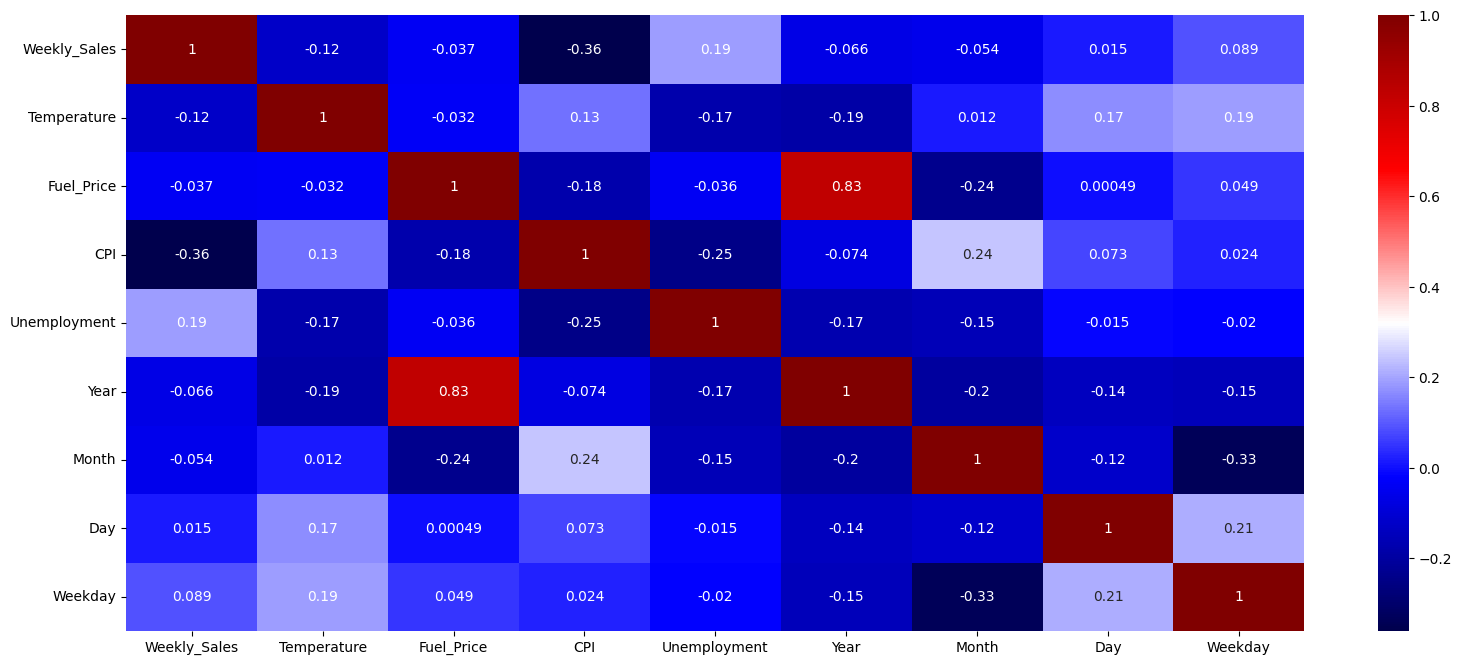

In [110]:
#plot for correlation matrix
f, ax = plt.subplots(figsize=(19, 8))
sns.heatmap(corr, annot=True, ax=ax, cmap= 'seismic')

In [111]:
# save file ready for Machine learning
dataset.to_csv('src/walmart_clean.csv', index=False)